## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv(filepath_or_buffer="../data/QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])
# usecols=['DATE', 'TAG', 'POSTS']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [23]:
#print(f"the first five rows {df.head} and the last five rows {df.tail}")
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [24]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1991 non-null   object
 1   TAG     1991 non-null   object
 2   POSTS   1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [43]:
df.groupby(by="TAG").sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [44]:
df.groupby(by="TAG").count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [47]:
x = df["DATE"][1]

In [61]:
df.DATE = pd.to_datetime(df["DATE"], format="%Y-%m-%d")
#type(ts)

In [60]:
df.head

0   2008-07-01
1   2008-08-01
2   2008-08-01
3   2008-08-01
4   2008-08-01
Name: DATE, dtype: datetime64[ns]

## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [14]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values = "POSTS")

In [15]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [70]:
print(f"{reshaped_df.count()} and ")

       TAG       
POSTS  assembly      144
       c             144
       c#            145
       c++           144
       delphi        144
       go            129
       java          144
       javascript    144
       perl          144
       php           144
       python        144
       r             142
       ruby          144
       swift         135
dtype: int64 and columns names are MultiIndex([('POSTS',   'assembly'),
            ('POSTS',          'c'),
            ('POSTS',         'c#'),
            ('POSTS',        'c++'),
            ('POSTS',     'delphi'),
            ('POSTS',         'go'),
            ('POSTS',       'java'),
            ('POSTS', 'javascript'),
            ('POSTS',       'perl'),
            ('POSTS',        'php'),
            ('POSTS',     'python'),
            ('POSTS',          'r'),
            ('POSTS',       'ruby'),
            ('POSTS',      'swift')],
           names=[None, 'TAG'])


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [71]:
print(f"columns names are {reshaped_df.columns}")

columns names are MultiIndex([('POSTS',   'assembly'),
            ('POSTS',          'c'),
            ('POSTS',         'c#'),
            ('POSTS',        'c++'),
            ('POSTS',     'delphi'),
            ('POSTS',         'go'),
            ('POSTS',       'java'),
            ('POSTS', 'javascript'),
            ('POSTS',       'perl'),
            ('POSTS',        'php'),
            ('POSTS',     'python'),
            ('POSTS',          'r'),
            ('POSTS',       'ruby'),
            ('POSTS',      'swift')],
           names=[None, 'TAG'])


In [76]:
reshaped_df.fillna(0, inplace=True)

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

plot showing the no of posts along the date of posted


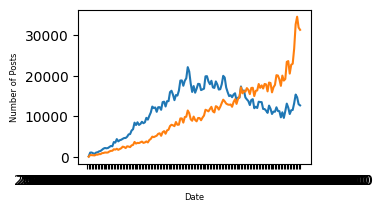

In [24]:
print("plot showing the no of posts along the date of posted")
plt.figure(figsize=(3,2))
plt.plot(reshaped_df.index, reshaped_df.java)
plt.xlabel('Date', fontsize=6)
plt.ylabel('Number of Posts', fontsize=6)
plt.plot(reshaped_df.index, reshaped_df.python)

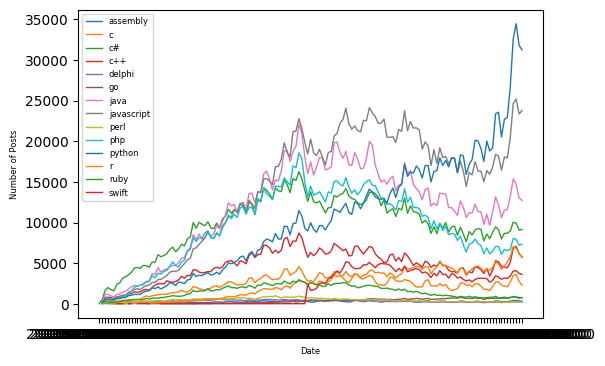

In [32]:
plt.figure(figsize=(6,4))
plt.xlabel('Date', fontsize=6)
plt.ylabel('Number of Posts', fontsize=6)
# all programming languages on one chart 
for x in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[x], linewidth = 1, label=reshaped_df[x].name)
plt.legend(fontsize=6)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [33]:
reshaped_df.rolling(window=6).mean()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01 00:00:00,296.000000,2431.000000,8807.000000,4851.166667,168.666667,687.000000,12050.000000,18252.000000,200.833333,6681.166667,23304.000000,4969.333333,780.000000,3238.000000
2020-04-01 00:00:00,305.500000,2567.000000,8903.500000,5105.333333,183.333333,721.666667,12420.166667,19293.333333,204.833333,6848.333333,24838.500000,5288.000000,771.166667,3332.166667
2020-05-01 00:00:00,316.000000,2716.833333,9040.166667,5421.500000,190.166667,749.500000,12844.500000,20461.500000,203.666667,6993.333333,26653.166667,5614.166667,779.166667,3465.666667
